In [1]:
# MIT Supply Chain Analytics 
# SC0x - Course 1

In [8]:
# Linear Algebra

def f(x):
    b = 37
    a = 6.0
    y = a*x + b
    return y

f(70)

457.0

In [9]:
def g(y):
    b = 37
    a = 6.0
    x = (y - b) / a
    return x

g(-126)

-27.166666666666668

In [12]:
# You are a Didgeridoo Supplier
# Variable cost $50
# Setup cost $10 - one-time cost
# Create a cost equation

def didg_cost_fn(quantity):
    setup = 10.0
    variable_cost = 50.0
    cost_to_produce = setup + variable_cost * quantity
    return cost_to_produce

In [11]:
# Cost to produce 4 didgeridoos
didg_cost_fn(quantity=4)

210.0

In [13]:
# Competitor also makes traditional didges 
# Variable cost $14
# Setup cost $120
# Create cost function for competition

def didg_competitor_cost_fn(quantity):
    setup = 120
    variable_cost = 14
    competition_cost_to_produce = setup + variable_cost * quantity
    return competition_cost_to_produce

In [14]:
# For competition to produce 4 didges
didg_competitor_cost_fn(quantity=4)

176

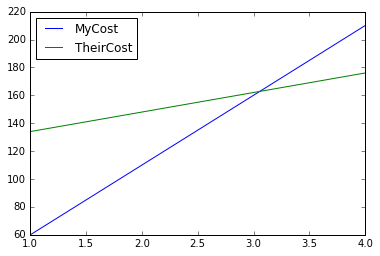

In [37]:
# Solve the system of equations 
# At what number of didgeridoos would it cost the competitor
# as much as it would cost us to make a didgeridoo?
import numpy as np
import pandas as pd

qty_counter = np.arange(1,5)
cost_matrix = {}

for i, qty in enumerate(qty_counter):
    my_cost = didg_cost_fn(qty)
    their_cost = didg_competitor_cost_fn(qty)     
    cost_matrix[qty] = [my_cost, their_cost]
   
col_names = {0:'MyCost',1:'TheirCost'}
cost_matrix = pd.DataFrame.from_dict(cost_matrix, orient='index')
cost_matrix.rename(columns=col_names, inplace=True)

%matplotlib inline
cost_matrix.plot(kind='line')

In [38]:
# Quadratic or Polynomial of degree 2 (parabolic)
    # where a, b, c are numbers and a is not equal to 0
    # y = ax^2 + bx + c
    # a > 0 is convex (or a "U" shape)
    # a < 0 the function is concave, or like an upside down "U" shape

# The roots of a quadratic are values of x when y=0
    # There can be 2, 1, or 0 roots
    
# There are two methods for finding roots
    # First: factoring: Find r1 and r2 such that f(x)=a(x-r1)(x-r2)
    # Second: Quadratic equation

In [100]:
# Find the roots of Quadratic Functions
import math

a = 20
b = 55
c = 22

def f(x, a, b, c):
    return a*x**2 + b*x + c

def quadratic(a, b, c):
    r1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
    r2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    return r1, r2

r1, r2 = quadratic(a, b, c)

should_be_zero_test_1 = f(r1, a, b, c)
should_be_zero_test_2 = f(r2, a, b, c)

print('''
Solving using the Quadratic Equation
-------------------------------------

Using an x value of %.3f 
will produce a y value of %.2f.

Using an x value of %.3f 
will produce a y value of %.2f.

The following (a,b,c) inputs:
    a = %i
    b = %i
    c = %i

Produce quadratic roots of:
    r1 = %.2f
    r2 = %.2f
    
''' % (r1, should_be_zero_test_1, r2, should_be_zero_test_2, a, b, c, r1, r2) )


Solving using the Quadratic Equation
-------------------------------------

Using an x value of -0.486 
will produce a y value of -0.00.

Using an x value of -2.264 
will produce a y value of 0.00.

The following (a,b,c) inputs:
    a = 20
    b = 55
    c = 22

Produce quadratic roots of:
    r1 = -0.49
    r2 = -2.26
    



In [106]:
# A Rectangle Exhibiting the Golden Ratio

# The golden ratio is important in architecture and design
# because it is the foundation for the most aesthetically
# pleasing rectangles and linear proportions.

# The golden ratio is a ratio of the length to width of a rectangle
# such that L/w = w / (L-w)
# where L is length, w is width.

# The equation above can be solved as a quadratic equation.
# Try to calculate the length of the rectangle with golden ratio
# proportions and a width of 13 cm. Answers to 1 decimal place.

# Explanation
# To solve this manually you need to find the positive root for the:
# f(x) = L**2 = 13*L - 13**2
# The positive root for the above duadratic polynomial is given by
# the quadratic equation formula for the A,B,C shown

# Wolfram Alpha
# solve L/w=w/(L-w) if w=13

width = 13

def quadratic_coefficients_golden_rectangle(w):
    '''
    Takes width returns a,b,c for quadratic equation
    to ultimately return length of the rectangle given width
    '''
    a = np.float64(1.0)
    b = np.float64(w)
    c = np.float64(w**2)
    
    return a,b,c

a, b, c = quadratic_coefficients_golden_rectangle(w=width)
#root1, root2 = quadratic(a,b,c)

a,b,c
# 13*1.618
# quadratic(a,b,c)

(1.0, 13.0, 169.0)

In [110]:
# iWidget Manufacturing
    # What price to set?
    # We have cost function cost = f(q) = 500000 + 75q
    # We have demand function unit sales = f(price) = 20000 - 80p
    # So we want to derive profitability
    # Revenue = (20000 - 20p)*p = 20000p - 80p**2
    # Costs = 500000 + 75(20000 - 80p) = 20000 - 6000p
    # Profit = Revenue - Costs
    # Profit = 20000p - 80p**2 - (20000000 - 6000p)
    # Profit = -80p**2 + 26000p - 2000000
    
# Use Quadratic Equation to find roots
r1, r2 = quadratic(a=-80, b=26000, c=-2000000)

print('Prices below %.2f and prices above %.2f will result in negative profits.' %(r1, r2))

Prices below 125.00 and prices above 200.00 will result in negative profits.




We want to maximize profit subject to the equations below.




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001757C47BA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001757C54CF98>]], dtype=object)

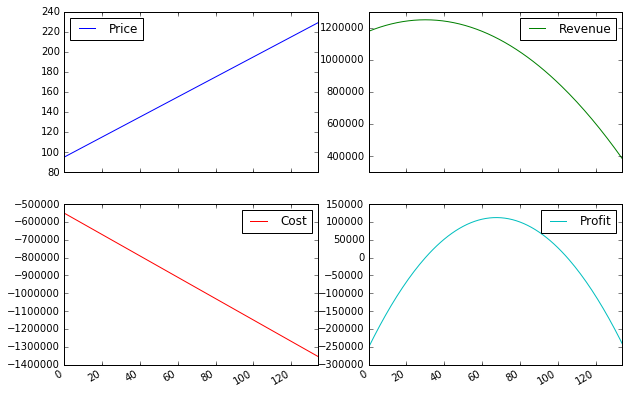

In [130]:
# Find point where we maximize profit
def revenue_function(p):
    revenue = 20000*p - 80*p**2
    return revenue

def cost_function(p):
    cost = 20000 - 6000*p
    return cost

def profit_function(p):
    profit = -80*p**2 + 26000*p - 2000000
    return profit

price_range = np.arange(95, 230)

price_matrix = {}
for i, price in enumerate(price_range):
    price = np.float64(price)
    cost = cost_function(price)
    revenue = revenue_function(price)
    profit = profit_function(price)
    price_matrix[i] = [price, revenue, cost, profit]
    
col_names = {0:'Price',1:'Revenue',2:'Cost',3:'Profit'}
price_matrix = pd.DataFrame.from_dict(price_matrix, orient='index')
price_matrix.rename(columns=col_names, inplace=True)

print('\n\nWe want to maximize profit subject to the equations below.\n\n')
price_matrix.plot(kind='line', subplots=True, figsize=[10,7], layout=(2,2))

In [126]:
# Remember that a graph with
    # y = 8x**2 -2
    # will be a U-shaped plot with 
    # a a y-intercept of -2

# Also, the equation
    # y = x*82 - 7x
    # will intercept at the origin at its lower root


Functional form:
y = ax**b

a = 6.78
b = 4.49

b values between 0 and 1 have a blunted growth rate



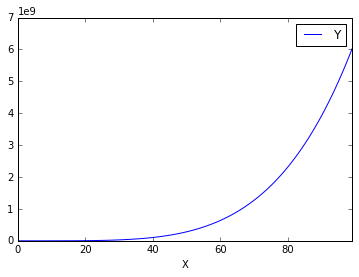

In [155]:
# Power function
    # y = f(x) = ax**b
    # Shape of the curve is dictated by value of b
    # if b = 1 this is a linear function without an intercept
    # if b > 1 the fn will increase exponentially
    # if 0 < b < 1 the fn tapers away from linear
    # if b < 0 then the function will decrease asymptotically to zero
import random
    
def power_function(a, b, x):
    y = a*x**b
    return y

a, b = random.random()*random.randint(1, 10), random.random()*random.randint(1, 10)
    
x_range = np.arange(0, 100)
results = pd.DataFrame()
for i, x in enumerate(x_range):
    y = power_function(a, b, x)
    results[i] = [x, y]
    
results = results.T
results.rename(columns={0:'X',1:'Y'}, inplace=True)
results.plot(x='X', y='Y', kind='line')

print('''
Functional form:
y = ax**b

a = %.2f
b = %.2f

b values between 0 and 1 have a blunted growth rate
''' % (a, b))


Functional form:
y = ab**x

a = 0.24
b = 0.21



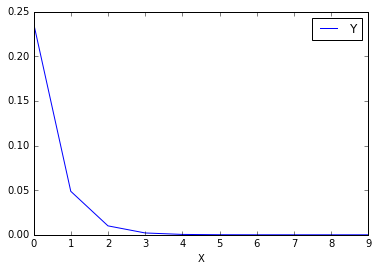

In [162]:
# Exponential function
    # Y = ab**x
    # Increases at an increasing rate if y = 2**x
    # Exponential growtn in physics, bio, finance, CS, etc.
    # Example is comopund interest Future = Pincipal (1 + Rate)**n_Periods
    # y = e**x Euler's number
    # e is a constant, 2.71828
    # Find it by looking back at interest example -- suppose 100% growth (double each period)
    # As increase number of periods, limit becomes 2.718
    
def exponential_function(a, b, x):
    y = a*b**x
    return y

a, b = random.random()*random.randint(1, 10), random.random()*random.randint(1, 10)
    
x_range = np.arange(0, 10)
results = pd.DataFrame()
for i, x in enumerate(x_range):
    y = exponential_function(a, b, x)
    results[i] = [x, y]
    
results = results.T
results.rename(columns={0:'X',1:'Y'}, inplace=True)
results.plot(x='X', y='Y', kind='line')

print('''
Functional form:
y = ab**x

a = %.2f
b = %.2f
''' % (a, b))